In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn import datasets

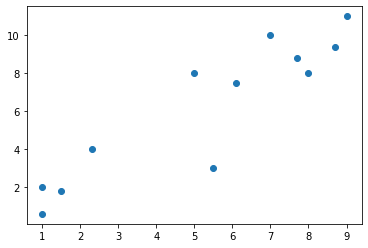

In [2]:
x = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])
plt.scatter(x, y)
plt.show()

In [3]:
training_x = np.vstack((x, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [4]:
clf = svm.SVC(kernel='linear', C=1.0) # define the model
clf.fit(training_x, training_y) # train the model

SVC(kernel='linear')

In [5]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

In [6]:
# get the y-offset for the linear equation
a = -w[0] / w[1]

In [7]:
# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

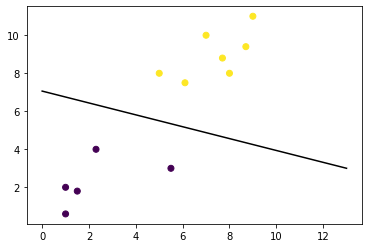

In [12]:
plt.plot(XX, yy, 'k-')
plt.scatter(training_x[:, 0], training_x[:, 1 ], c=training_y)
#plt.legend()
plt.show()

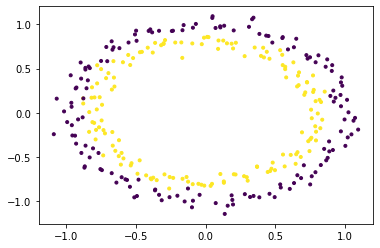

In [9]:
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [10]:
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)
nonlinear_clf.fit(circle_X, circle_y)

SVC()

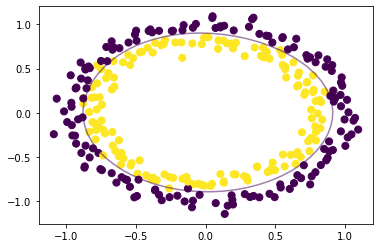

In [11]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    
    # shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    # get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P, levels=[0], alpha=0.5, linestyles=['-'])
    
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()